#** Question**

# **Difference between Climate Change and Global Warming?**

Climate change and global warming are related, but not exactly the same thing. Here's the breakdown:

Global warming: This refers specifically to the long-term increase in the average global temperature near Earth's surface. It's primarily caused by human activities that release greenhouse gases into the atmosphere. These gases trap heat like a blanket, leading to a gradual warming trend.

Climate change: This is a broader term that encompasses not just rising temperatures, but also the long-term alteration of temperature and typical weather patterns in a place. Climate change can manifest as:

More frequent and intense heat waves:

Changes in precipitation patterns (droughts in some areas, floods in others)
Rising sea levels
Stronger storms
Changes in plant and animal life

Why it's important: Understanding the difference between climate change and global warming is important because it helps us grasp the full scope of the issue. Global warming is the root cause, but climate change is the consequence – a complex web of effects that will impact everything from weather patterns to agriculture, food security, and human health.

Here's an analogy: Imagine your house is getting warmer (global warming). Climate change would be the burst pipes, failing air conditioning, and mold growth that result from that rising heat.

By understanding the bigger picture of climate change, we can make more informed decisions about how to mitigate its effects and adapt to the changes we're already experiencing.

**# Data Sources**
Describe your data sources :where they are from

### Datasource1: Climate Change
* Metadata URL: https://berkeleyearth.org/global-temperature-report-for-2023/
* Data URL: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/code
* Data Type: CSV
* License NO: CC BY-NC-SA 4.0 DEED
* About Dataset: This Dataset contains information about average land temperature and  for maximum and minimum land temperatures and global ocean and land temperatures.

### Datasource2: Global Warming

* Data URL: https://www.kaggle.com/datasets/kkhandekar/climate-change-vs-global-warming/data?select=Breakdown_Region.csv
* Data Type: CSV
* License NO: CC0 1.0 DEED
* About Dataset : This Dataset contains information about  global warning chance according to cities.










What is the data structure and quality of your sources? (Compare lecture D01)
Describe the licenses of your data sources, why you are allowed to use the data and how you are planning to follow their obligations
If your source data is under a standard open-data license just pointing out where to find that is enough information for being allowed to use it, please still describe how you plan to fulfill their obligations

Import  Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Load the Dataset

In [ ]:
climate_data = pd.read_csv('Project/Breakdown_Region.csv')

temperature_data = pd.read_csv('Project/GlobalLandTemperaturesByCountry.csv')

# Display the first few rows of each dataset
climate_data.head(), temperature_data.head()

(            Country Climate change: (1/1/04 - 9/27/21)  \
 0          Kiribati                               100%   
 1  Marshall Islands                                84%   
 2        Micronesia                               100%   
 3   Solomon Islands                                82%   
 4           Vanuatu                                86%   
 
   Global Warming: (1/1/04 - 9/27/21)  
 0                                NaN  
 1                                16%  
 2                                NaN  
 3                                18%  
 4                                14%  ,
            dt  AverageTemperature  AverageTemperatureUncertainty Country
 0  1743-11-01               4.384                          2.294   Åland
 1  1743-12-01                 NaN                            NaN   Åland
 2  1744-01-01                 NaN                            NaN   Åland
 3  1744-02-01                 NaN                            NaN   Åland
 4  1744-03-01                 Na

Merge the Dataset

In [ ]:
# Merge the datasets on the 'Country' column
merged_data = pd.merge(climate_data, temperature_data, on='Country')

# Group by 'Country' and keep the row with the highest average values
# result_data = merged_data.loc[merged_data.groupby('Country')['AverageTemperature'].idxmax()]

# Display the result
# result_data.head()

# merged_data




In [ ]:
# Ensure there are no NaN values in 'Country' and 'AverageTemperature' columns
merged_data = merged_data.dropna(subset=['Country', 'AverageTemperature'])

# Reset index to avoid alignment issues
merged_data = merged_data.reset_index(drop=True)

# Group by 'Country' and keep the row with the highest 'AverageTemperature'
result_data = merged_data.loc[merged_data.groupby('Country')['AverageTemperature'].idxmax()]

# Save the result to a new CSV file
# result_data.to_csv('filtered_data.csv', index=False)

# Display the result
result_data

,Country,Climate change: (1/1/04 - 9/27/21),Global Warming: (1/1/04 - 9/27/21),dt,AverageTemperature,AverageTemperatureUncertainty
165914,Afghanistan,68%,32%,1997-07-01,28.533,0.410
75623,Albania,75%,25%,1757-07-01,25.843,5.336
205876,Algeria,86%,14%,2003-07-01,35.829,0.400
16665,American Samoa,100%,NaN,2003-01-01,28.543,0.231
432419,Andorra,NaN,NaN,2003-08-01,24.313,0.291
...,...,...,...,...,...,...
293286,Vietnam,63%,37%,1912-06-01,28.463,0.358
216672,Western Sahara,100%,NaN,2004-08-01,30.092,0.704
345914,Yemen,100%,NaN,1998-06-01,32.737,1.080
38902,Zambia,74%,26%,2005-10-01,26.282,0.325


### **Data Cleaning**

In [ ]:
# Ensure there are no NaN values in 'Country' and 'AverageTemperature' columns
merged_data = merged_data.dropna(subset=['Country', 'AverageTemperature','Climate change: (1/1/04 - 9/27/21)', 'Global Warming: (1/1/04 - 9/27/21)','AverageTemperatureUncertainty'])

# Reset index to avoid alignment issues
merged_data = merged_data.reset_index(drop=True)

# Remove duplicates from the dataset
merged_data = merged_data.drop_duplicates()

# Group by 'Country' and keep the row with the highest 'AverageTemperature'
result_data = merged_data.loc[merged_data.groupby('Country')['AverageTemperature'].idxmax()]

# Save the result to a new CSV file (uncomment the line below if you need to save the file)
# result_data.to_csv('filtered_data.csv', index=False)

# Display the result
print(result_data)


            Country Climate change: (1/1/04 - 9/27/21)  \

147321  Afghanistan                                68%   

66911       Albania                                75%   

177845      Algeria                                86%   

332397    Argentina                                72%   

259738      Armenia                                75%   

...             ...                                ...   

203091   Uzbekistan                                63%   

322375    Venezuela                                75%   

251442      Vietnam                                63%   

32062        Zambia                                74%   

18429      Zimbabwe                                72%   



       Global Warming: (1/1/04 - 9/27/21)          dt  AverageTemperature  \

147321                                32%  1997-07-01              28.533   

66911                                 25%  1757-07-01              25.843   

177845                                14%  2003-07-01   

In [ ]:
# Reset index to avoid alignment issues
merged_data = merged_data.reset_index(drop=True)
# Display the result
print(result_data)


            Country Climate change: (1/1/04 - 9/27/21)  \

147321  Afghanistan                                68%   

66911       Albania                                75%   

177845      Algeria                                86%   

332397    Argentina                                72%   

259738      Armenia                                75%   

...             ...                                ...   

203091   Uzbekistan                                63%   

322375    Venezuela                                75%   

251442      Vietnam                                63%   

32062        Zambia                                74%   

18429      Zimbabwe                                72%   



       Global Warming: (1/1/04 - 9/27/21)          dt  AverageTemperature  \

147321                                32%  1997-07-01              28.533   

66911                                 25%  1757-07-01              25.843   

177845                                14%  2003-07-01   

In [ ]:
# Convert the 'Date' column to datetime format
merged_data['dt'] = pd.to_datetime(merged_data['dt'])

# Extract the month from the 'Date' column
merged_data['Month'] = merged_data['dt'].dt.month

# Reset index to avoid alignment issues
merged_data = merged_data.reset_index(drop=True)
merged_data

,Country,Climate change: (1/1/04 - 9/27/21),Global Warming: (1/1/04 - 9/27/21),dt,AverageTemperature,AverageTemperatureUncertainty,Month
0,Solomon Islands,82%,18%,1867-01-01,26.807,1.035,1
1,Solomon Islands,82%,18%,1867-02-01,26.416,0.831,2
2,Solomon Islands,82%,18%,1867-03-01,26.310,0.802,3
3,Solomon Islands,82%,18%,1867-04-01,26.648,0.897,4
4,Solomon Islands,82%,18%,1867-05-01,26.347,0.703,5
...,...,...,...,...,...,...,...
343221,Japan,66%,34%,2013-04-01,10.102,0.322,4
343222,Japan,66%,34%,2013-05-01,15.256,0.235,5
343223,Japan,66%,34%,2013-06-01,19.961,0.380,6
343224,Japan,66%,34%,2013-07-01,24.286,0.369,7


In [ ]:
result_data

,Country,Climate change: (1/1/04 - 9/27/21),Global Warming: (1/1/04 - 9/27/21),dt,AverageTemperature,AverageTemperatureUncertainty
147321,Afghanistan,68%,32%,1997-07-01,28.533,0.410
66911,Albania,75%,25%,1757-07-01,25.843,5.336
177845,Algeria,86%,14%,2003-07-01,35.829,0.400
332397,Argentina,72%,28%,2012-01-01,23.290,0.333
259738,Armenia,75%,25%,2006-08-01,25.291,0.254
...,...,...,...,...,...,...
203091,Uzbekistan,63%,37%,1984-07-01,30.375,0.305
322375,Venezuela,75%,25%,2010-03-01,27.807,0.418
251442,Vietnam,63%,37%,1912-06-01,28.463,0.358
32062,Zambia,74%,26%,2005-10-01,26.282,0.325


In [ ]:
# Convert the Index object to a list
column_names_list = list(result_data.columns)

# Print the list of column names
print("Column names as list:", column_names_list)



Column names as list: ['Country', 'Climate change: (1/1/04 - 9/27/21)', 'Global Warming: (1/1/04 - 9/27/21)', 'dt', 'AverageTemperature', 'AverageTemperatureUncertainty']


In [ ]:
#Change the Columns Name
# Rename specific columns (example: 'OldName1' to 'NewName1' and 'OldName2' to 'NewName2')
columns_to_rename = {
    'Climate change: (1/1/04 - 9/27/21)': 'Climate change',
    'Global Warming: (1/1/04 - 9/27/21)': 'Global Warming',

    # Add other column renaming as needed
}
merged_data = result_data.rename(columns=columns_to_rename)
merged_data

,Country,Climate change,Global Warming,dt,AverageTemperature,AverageTemperatureUncertainty
147321,Afghanistan,68%,32%,1997-07-01,28.533,0.410
66911,Albania,75%,25%,1757-07-01,25.843,5.336
177845,Algeria,86%,14%,2003-07-01,35.829,0.400
332397,Argentina,72%,28%,2012-01-01,23.290,0.333
259738,Armenia,75%,25%,2006-08-01,25.291,0.254
...,...,...,...,...,...,...
203091,Uzbekistan,63%,37%,1984-07-01,30.375,0.305
322375,Venezuela,75%,25%,2010-03-01,27.807,0.418
251442,Vietnam,63%,37%,1912-06-01,28.463,0.358
32062,Zambia,74%,26%,2005-10-01,26.282,0.325


In [ ]:
# Convert the Index object to a list
column_names_list = list(merged_data.columns)

# Print the list of column names
print("Column names as list:", column_names_list)


Column names as list: ['Country', 'Climate change', 'Global Warming', 'dt', 'AverageTemperature', 'AverageTemperatureUncertainty']


### **Data Pipeline**
Describe your data pipeline on a high level, which technology did you use to implement it
Which transformation or cleaning steps did you do and why?
What problems did you encounter and how did you solve them?
Describe how your pipeline deals with errors or changing input data
## High-Level Data Pipeline Description

This data pipeline appears to be designed for cleaning and processing climate data, likely focused on a specific analysis requiring a single data point per country. Here's a breakdown of the steps:


1. **Cleaning and Transformation:**
    * **Handling Missing Values:** It removes rows with missing values (`NaN`) in specific columns (`Country`, `AverageTemperature`, etc.). This ensures data quality for further analysis.
    * **Resetting Index:** This step helps avoid indexing issues during subsequent operations like grouping and filtering.
    * **Removing Duplicates:** It removes duplicate rows based on all columns, potentially keeping the first occurrence.
    * **Grouping and Selecting Maximum Temperature:** It groups data by `Country` and selects the row with the highest `AverageTemperature`. This might be useful if you're interested in the country with the highest average temperature within the dataset.
    * **Converting Date Format:** (commented out) It converts the `dt` column to a datetime format, potentially useful for time-based analysis.
    * **Extracting Month:** (commented out) It extracts the month from the `dt` column, creating a new `Month` column.
    * **Renaming Columns:** It renames specific columns for clarity (e.g., "Climate change: (1/1/04 - 9/27/21)" to "Climate change").


## Technology Used

This code snippet utilizes the Pandas library for data manipulation in Python. Pandas DataFrames and their functionalities are used for cleaning, transforming, and analyzing the data.

## Transformation and Cleaning Steps

The code performs several cleaning and transformation steps:

* **Handling Missing Values:** This is crucial to ensure data quality and prevent errors in calculations or analysis that rely on complete data.
* **Resetting Index:** This is done to avoid potential indexing issues that might arise during operations like grouping or selecting specific rows.
* **Removing Duplicates:** Depending on the analysis, keeping only unique entries might be necessary.
* **Grouping and Selecting Maximum Temperature:** This could be relevant if you're interested in the country with the highest average temperature within the specific timeframe.
* **Converting Date Format and Extracting Month:** (commented out) These steps might be useful for time-based analysis where manipulating dates or extracting specific parts like month is required.
* **Renaming Columns:** Improves code readability and clarity by using more descriptive column names.


### **Data Visualisation **




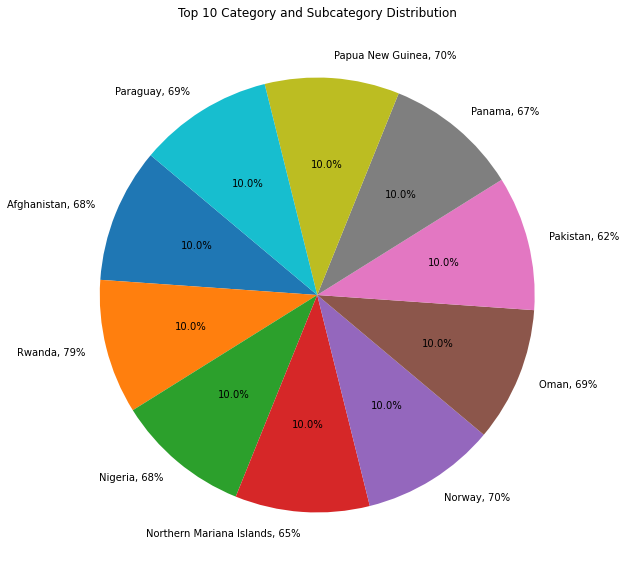

In [ ]:
# Make sure to adjust 'Category' and 'Subcategory' to the names of your columns
# Group by both 'Category' and 'Subcategory', and count the occurrences
category_subcategory_counts = merged_data.groupby(['Country', 'Climate change']).size().reset_index(name='counts')

# Create labels for the pie chart
#labels = [f'{cat}, {subcat}' for cat, subcat in zip(category_subcategory_counts['Country'], category_subcategory_counts['Climate change'])]
# Sort the DataFrame by counts in descending order and select the top 10
top_10_counts = category_subcategory_counts.sort_values(by='counts', ascending=False).head(10)


# Create labels for the pie chart
labels = [f'{cat}, {subcat}' for cat, subcat in zip(top_10_counts['Country'], top_10_counts['Climate change'])]

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_10_counts['counts'], labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Category and Subcategory Distribution')
plt.show()



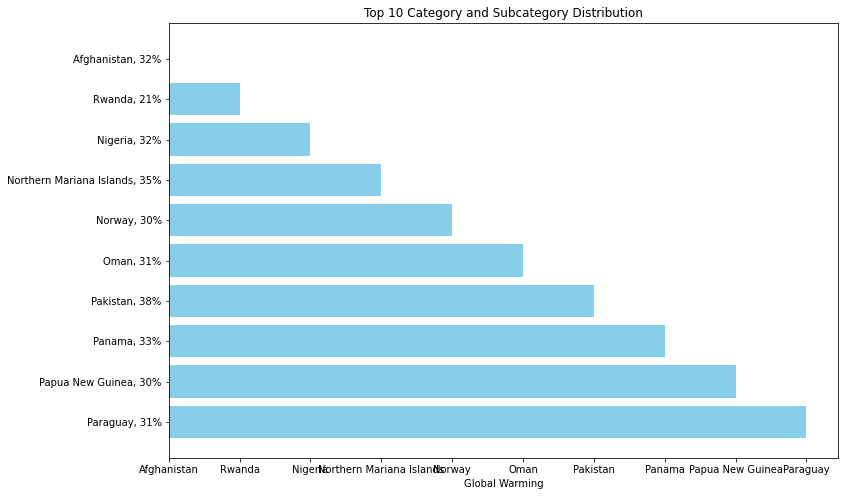

In [ ]:


# Make sure to adjust 'Category' and 'Subcategory' to the names of your columns
# Group by both 'Category' and 'Subcategory', and count the occurrences
category_subcategory_counts = merged_data.groupby(['Country', 'Global Warming']).size().reset_index(name='counts')

# Sort the DataFrame by counts in descending order and select the top 10
top_10_counts = category_subcategory_counts.sort_values(by='counts', ascending=False).head(10)

# Create labels for the bar chart
labels = [f'{cat}, {subcat}' for cat, subcat in zip(top_10_counts['Country'], top_10_counts['Global Warming'])]

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.barh(labels, top_10_counts['Country'], color='skyblue')
plt.xlabel('Global Warming')
plt.title('Top 10 Category and Subcategory Distribution')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest counts at the top
plt.show()


Text(0.5, 0, '(The red line referes to the Mean)')

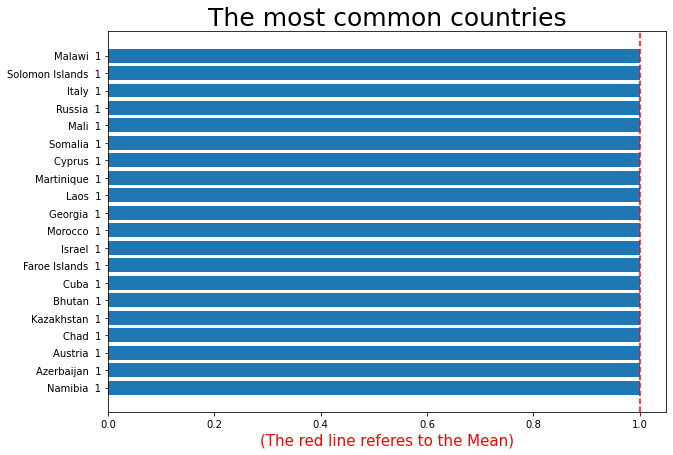

In [ ]:
# Q1 . What are the most common Countries in our data set ?
most_countries = df["Country"].value_counts()[:20]
cwc = []
for i in zip(most_countries.index , most_countries.values):
    cit = i[0]+"  "+str(i[1])
    cwc.append(cit)
plt.figure(figsize=(10,7))
plt.barh(cwc , most_countries.values)
plt.axvline(x=df["Country"].value_counts().values.mean() , color="red" ,linestyle="--" )
plt.title("The most common countries" , fontsize=25)
plt.xlabel("(The red line referes to the Mean)" , c="red" , fontsize=15)

### **Result and Limitations**


This dataset isn't necessarily the best dataset to definitively find the difference between global warming and climate change. Here's why:

Limited Timeframe: The data covers a period from January 1st, 2004 to September 27th, 2021 (less than 18 years). Climate change is a long-term phenomenon measured in decades or even centuries. This dataset wouldn't capture the long-term trends needed to fully distinguish climate change from natural fluctuations in weather.

Missing Data: The dataset focuses on "Climate Change" and "Global Warming" values, but it doesn't provide any specific details on what those values represent (e.g., temperature change, policy implementations). Without that context, it's difficult to understand how they differ.

Limited Scope: The dataset seems to be focused on a single country, while climate change and global warming are global issues. A broader dataset encompassing multiple countries over a longer period would be more suitable.

However, this dataset could be a starting point for further investigation if:

More context is available:  If there's additional information explaining how "Climate Change" and "Global Warming" are measured in this dataset, it could provide some insights into how they differ.

Part of a larger dataset: This dataset might be a snippet of a larger study that includes more comprehensive data (e.g., covering multiple countries and longer timeframes).

Overall, a more suitable dataset to study the difference between climate change and global warming would include:

Global data:  Information on average temperatures, precipitation patterns, extreme weather events, etc., collected from multiple countries over several decades.

Longitudinal data:  Data measured over a long period to capture long-term trends.

Specific metrics:  Clearly defined metrics for "Climate Change" and "Global Warming" within the dataset.

By analyzing these elements, scientists can compare global temperature increases (global warming) with the resulting changes in weather patterns and ecosystems (climate change).
